In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
from scipy import stats
from scipy.io import loadmat
from sklearn.cluster.bicluster import SpectralBiclustering, SpectralCoclustering
from skimage.measure import compare_ssim
from scipy.spatial.distance import cosine
%matplotlib inline
import cPickle
from eegtools.io import load_edf

In [2]:
data = loadmat('edf_ICA_channels.mat')['arr']
print len(data), len(data[0])

61 3383768


In [3]:
length_of_intervals = 30000
channels = 61
edges = 1830
total_interval = len(data[0])/length_of_intervals + 1
channels_data = [[None for j in range(edges)] for i in range(total_interval)] 

In [4]:
zer = []
pos_nine = []
abs_nine = []
def calculate_pearson(interval):
    index_counter = 0
    zeroes = 0
    pnine = 0
    anine = 0
    x = length_of_intervals * interval
    y = x + length_of_intervals
    for start in range(channels):
        for index in range(start + 1, channels):
            if interval != total_interval:
                if (pearsonr(data[start][x:y], data[index][x:y])[1] >= 0.05):
                    channels_data[interval][index_counter] = 0
                    zeroes += 1
                else:
                    channels_data[interval][index_counter] = pearsonr(data[start][x:y], data[index][x:y])[0]
                if (pearsonr(data[start][x:y], data[index][x:y])[0] >= 0.9):
                    pnine += 1
                if (abs(pearsonr(data[start][x:y], data[index][x:y])[0]) >= 0.9):
                    anine += 1
                
            else:
                if (pearsonr(data[start][x:], data[index][x:])[1] >= 0.05):
                    channels_data[interval][index_counter] = 0
                    zeroes += 1
                else:
                    channels_data[interval][index_counter] = pearsonr(data[start][x:], data[index][x:])[0]
                if (pearsonr(data[start][x:y], data[index][x:])[0] >= 0.9):
                    pnine += 1
                if (abs(pearsonr(data[start][x:y], data[index][x:])[0]) >= 0.9):
                    anine += 1    
                
            index_counter += 1
    zer.append(zeroes)
    pos_nine.append(pnine)
    abs_nine.append(anine)
    print index_counter, zeroes, pnine, anine

In [5]:
for i in range(total_interval):
    print 'Calculating Interval %s' % i,
    calculate_pearson(i)

Calculating Interval 0 1830 21 98 98
Calculating Interval 1 1830 24 123 123
Calculating Interval 2 1830 27 125 125
Calculating Interval 3 1830 32 106 106
Calculating Interval 4 1830 28 109 109
Calculating Interval 5 1830 30 119 119
Calculating Interval 6 1830 29 105 105
Calculating Interval 7 1830 31 111 111
Calculating Interval 8 1830 34 113 113
Calculating Interval 9 1830 26 110 110
Calculating Interval 10 1830 16 118 118
Calculating Interval 11 1830 4 117 117
Calculating Interval 12 1830 3 122 122
Calculating Interval 13 1830 0 112 112
Calculating Interval 14 1830 27 95 95
Calculating Interval 15 1830 16 97 97
Calculating Interval 16 1830 23 95 95
Calculating Interval 17 1830 16 103 103
Calculating Interval 18 1830 21 91 91
Calculating Interval 19 1830 14 109 109
Calculating Interval 20 1830 15 134 134
Calculating Interval 21 1830 14 111 111
Calculating Interval 22 1830 14 95 95
Calculating Interval 23 1830 12 91 91
Calculating Interval 24 1830 22 113 113
Calculating Interval 25 183

In [6]:
print sum(zer), sum(zer[:-1])
print sum(pos_nine), sum(pos_nine[:-1])
print sum(abs_nine), sum(abs_nine[:-1])

2393 2393
15602 14520
16213 14520


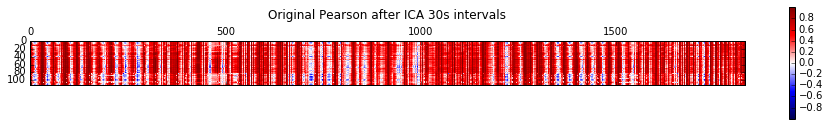

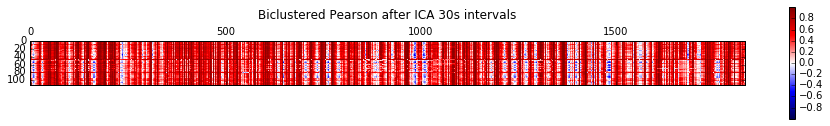

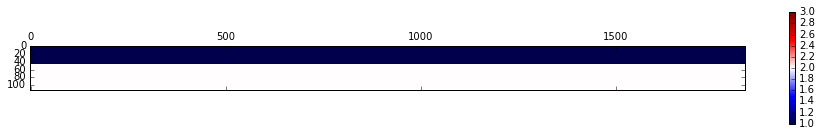

In [9]:
post_process_data = np.array(channels_data)
spectral_model = SpectralBiclustering((3,1))
spectral_model.fit(post_process_data)
fit_data = post_process_data[np.argsort(spectral_model.row_labels_)]
fit_data = fit_data[:, np.argsort(spectral_model.column_labels_)]
plt.matshow(post_process_data, cmap=plt.cm.seismic)
plt.colorbar()
plt.title('Original Pearson after ICA 30s intervals\n')
# plt.savefig('../media/json/pearson/ICA/pearson_ICA_30s.png')
plt.matshow(fit_data, cmap=plt.cm.seismic)
plt.colorbar()
plt.title('Biclustered Pearson after ICA 30s intervals\n')
# plt.savefig('../media/json/pearson/ICA/pearson_ICA_30s.png')
plt.matshow(np.outer(np.sort(spectral_model.row_labels_) + 1,
                     np.sort(spectral_model.column_labels_) + 1),
            cmap=plt.cm.seismic)
plt.colorbar()

In [25]:
# all intervals and edges
bins = 200
sets = []
for i in range(-bins/2, bins/2):
    low_bnd = round(float(i)/(bins/2), 2)
    sets.append(low_bnd)
# sets = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# dictionary = {}
num = []
for i in range(len(sets)):
#     dictionary[sets[i]] = 0
    num.append(0)
    
for row in channels_data:
    for val in row:
        for lower in range(len(sets)):
            if lower != len(sets) - 1:
                if (val >= sets[lower] and val < sets[lower+1]):
#                     dictionary[sets[lower]] += 1
                    num[lower] += 1
            else:
                if (val >= sets[lower]):
#                     dictionary[sets[lower]] += 1
                    num[lower] += 1
# print dictionary
print num
# print sets

[223, 184, 63, 33, 25, 26, 14, 5, 10, 28, 11, 4, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 3, 1, 3, 3, 1, 0, 0, 1, 2, 1, 2, 4, 0, 1, 2, 2, 0, 3, 6, 5, 4, 8, 10, 12, 9, 15, 21, 20, 17, 20, 41, 45, 40, 44, 65, 50, 94, 72, 82, 88, 103, 101, 128, 141, 156, 156, 204, 181, 187, 205, 227, 264, 241, 341, 289, 361, 382, 404, 437, 515, 556, 566, 593, 628, 695, 730, 763, 812, 832, 912, 968, 861, 0, 2393, 956, 1157, 1175, 1327, 1253, 1372, 1343, 1373, 1520, 1481, 1532, 1574, 1577, 1609, 1613, 1576, 1720, 1704, 1742, 1833, 1903, 1792, 1823, 1867, 1915, 1824, 1941, 1880, 1847, 1896, 2010, 1960, 1998, 1996, 1988, 2010, 2086, 2095, 2019, 2079, 2198, 2126, 2147, 2078, 2088, 2173, 2102, 2199, 2141, 2142, 2172, 2259, 2236, 2128, 2217, 2282, 2201, 2231, 2204, 2233, 2197, 2249, 2249, 2126, 2139, 2256, 2247, 2144, 2167, 2226, 2208, 2193, 2255, 2235, 2328, 2225, 2267, 2043, 2075, 2014, 1937, 1914, 1846, 1928, 1890, 1982, 1992, 2067, 2099, 2129, 2051, 1966, 1864, 1925, 1887, 1443, 973, 422, 942]


In [57]:
# # one channel vs all, all intervals
# sets = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# # dictionary = {}
# num = [[] for i in range(61)]
# for i in range(61):
#     for j in range(len(sets)):
#     #     dictionary[sets[i]] = 0
#         num[i].append(0)
    
# for row in range(len(channels_data)):
#     for val in channels_data[row][0:61]:
#         for lower in range(len(sets)):
#             if lower != len(sets) - 1:
#                 if (val >= sets[lower] and val < sets[lower+1]):
# #                     dictionary[sets[lower]] += 1
#                     num[row][lower] += 1
#             else:
#                 if (val >= sets[lower]):
# #                     dictionary[sets[lower]] += 1
#                     num[row][lower] += 1
# # print dictionary
# print num

IndexError: list index out of range

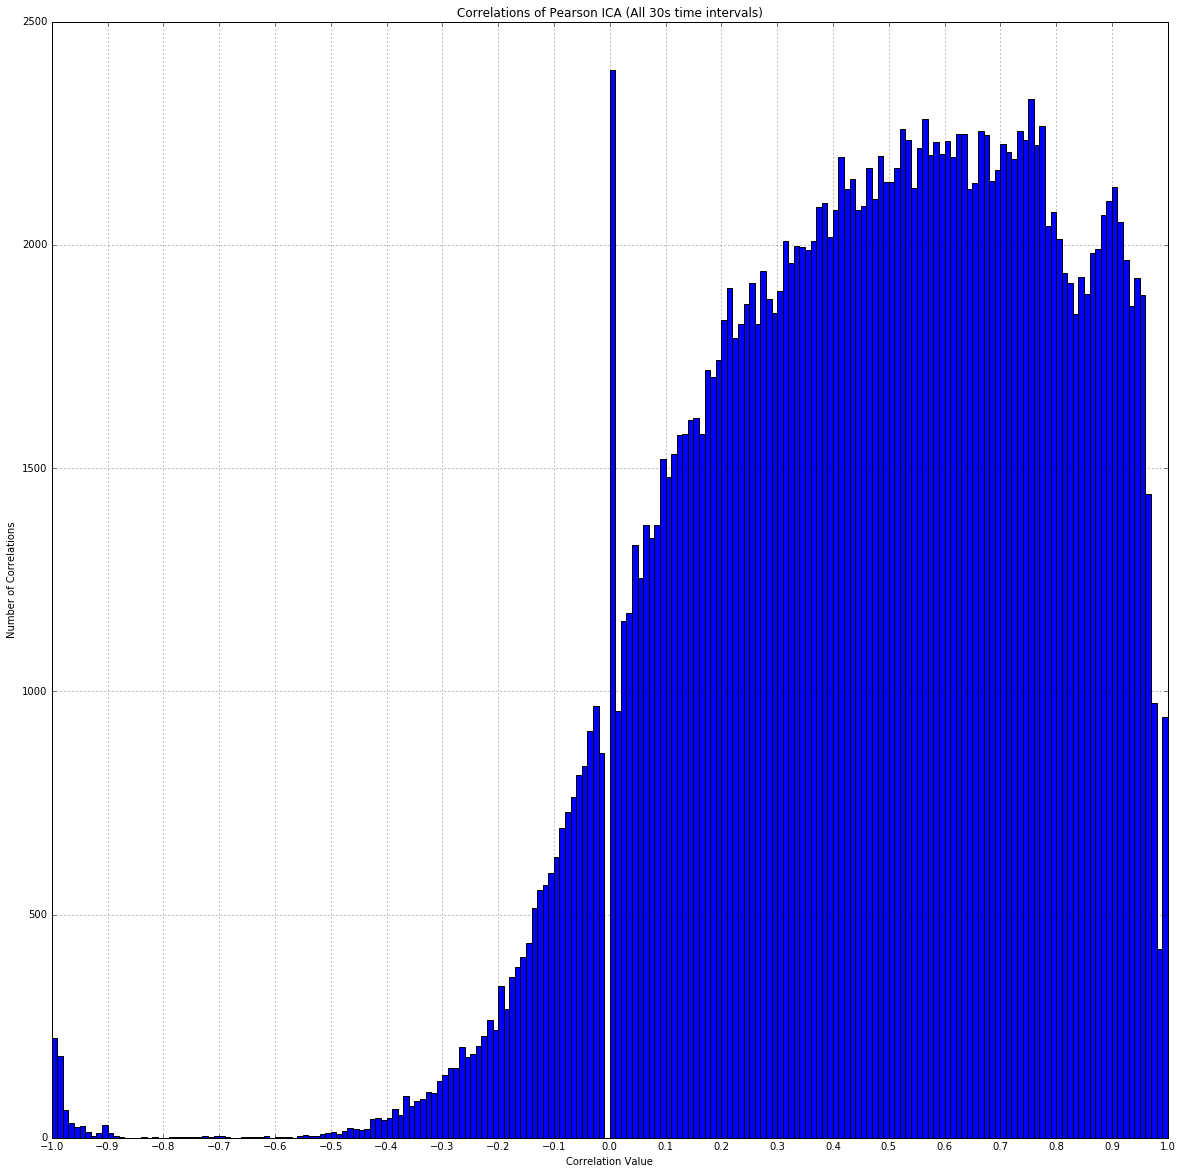

In [26]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1)
ax.bar(sets, num, width= 2.0/bins)
ax.set_title("Correlations of Pearson ICA (All 30s time intervals)")
ax.set_ylabel("Number of Correlations")
ax.set_xlabel("Correlation Value")
ax.grid(True)
ax.set_xticks([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
# ax.set_xlim([0.4,1])
# ax.set_ylim([0, 2200])
# plt.savefig("Correlations_of_ICA_pearson(100_bins).png")
plt.show()

In [17]:
total_zero = 0
zeroed_value = []
for i in range(len(channels_data)):
    for j in range(len(channels_data[i])):
        if channels_data[i][j] == 0:
            zeroed_value.append((i,j))
            total_zero += 1
print total_zero
print zeroed_value

2393
[(0, 49), (0, 461), (0, 513), (0, 660), (0, 670), (0, 671), (0, 700), (0, 758), (0, 760), (0, 766), (0, 882), (0, 1185), (0, 1215), (0, 1254), (0, 1317), (0, 1407), (0, 1437), (0, 1719), (0, 1721), (0, 1762), (0, 1773), (1, 10), (1, 70), (1, 75), (1, 133), (1, 160), (1, 283), (1, 410), (1, 460), (1, 563), (1, 569), (1, 665), (1, 753), (1, 770), (1, 852), (1, 945), (1, 995), (1, 1286), (1, 1322), (1, 1375), (1, 1516), (1, 1539), (1, 1565), (1, 1692), (1, 1763), (2, 76), (2, 105), (2, 164), (2, 166), (2, 239), (2, 300), (2, 302), (2, 351), (2, 624), (2, 665), (2, 675), (2, 772), (2, 882), (2, 901), (2, 942), (2, 992), (2, 1214), (2, 1320), (2, 1405), (2, 1414), (2, 1432), (2, 1492), (2, 1494), (2, 1543), (2, 1584), (2, 1675), (2, 1762), (3, 47), (3, 103), (3, 241), (3, 246), (3, 458), (3, 459), (3, 461), (3, 462), (3, 492), (3, 666), (3, 707), (3, 716), (3, 719), (3, 720), (3, 721), (3, 746), (3, 766), (3, 793), (3, 814), (3, 853), (3, 855), (3, 856), (3, 1348), (3, 1378), (3, 1382)

In [28]:
for i,j in zeroed_value:
    chan1, chan2 = edge_to_channel[j]
    time_start = i * 30000
    time_end = time_start + 30000
    
    if(time_start%60000 == 0):
        time_frame = str(time_start/60000) + ":00 - " + str(time_start/60000) + ":30"
    else:
        time_frame = str(time_start/60000) + ":30 - " + str(time_start/60000 + 1) + ":00"
    print time_frame, edge_to_channel[j], pearsonr(data[chan1][time_start:time_end], data[chan2][time_start:time_end])

 0:00 - 0:30 (0, 50) (0.010850589789530119, 0.060196133247977901)
0:00 - 0:30 (8, 18) (0.010257038921394717, 0.07564330345075708)
0:00 - 0:30 (9, 19) (-0.005687677974127758, 0.32457414700757115)
0:00 - 0:30 (12, 19) (-0.010015267785658581, 0.082799895747636729)
0:00 - 0:30 (12, 29) (-0.0097620135746375736, 0.090874972779931326)
0:00 - 0:30 (12, 30) (0.0075978607245734478, 0.18819007378633332)
0:00 - 0:30 (12, 59) (-0.0047801954433516619, 0.40771333330761816)
0:00 - 0:30 (14, 24) (0.0087830965925569174, 0.12819889199079987)
0:00 - 0:30 (14, 26) (0.0031064621084676705, 0.59055364561351009)
0:00 - 0:30 (14, 32) (-0.0059869461888025768, 0.29976587967111551)
0:00 - 0:30 (16, 59) (-0.0055828261248001918, 0.33357348247458363)
0:00 - 0:30 (24, 46) (0.0077074080375716357, 0.18190042565111642)
0:00 - 0:30 (25, 41) (0.0061347234810737832, 0.28799469305987768)
0:00 - 0:30 (26, 46) (0.0032962061472737699, 0.56806918409960749)
0:00 - 0:30 (28, 44) (-0.001939633976263598, 0.73691552650179459)
0:00 - 

KeyboardInterrupt: 

In [18]:
counter = 0
edge_to_channel = {}
for i in range(61):
    for j in range(i+1, 61):
        edge_to_channel[counter] = (i, j)
        counter += 1
print edge_to_channel

{0: (0, 1), 1: (0, 2), 2: (0, 3), 3: (0, 4), 4: (0, 5), 5: (0, 6), 6: (0, 7), 7: (0, 8), 8: (0, 9), 9: (0, 10), 10: (0, 11), 11: (0, 12), 12: (0, 13), 13: (0, 14), 14: (0, 15), 15: (0, 16), 16: (0, 17), 17: (0, 18), 18: (0, 19), 19: (0, 20), 20: (0, 21), 21: (0, 22), 22: (0, 23), 23: (0, 24), 24: (0, 25), 25: (0, 26), 26: (0, 27), 27: (0, 28), 28: (0, 29), 29: (0, 30), 30: (0, 31), 31: (0, 32), 32: (0, 33), 33: (0, 34), 34: (0, 35), 35: (0, 36), 36: (0, 37), 37: (0, 38), 38: (0, 39), 39: (0, 40), 40: (0, 41), 41: (0, 42), 42: (0, 43), 43: (0, 44), 44: (0, 45), 45: (0, 46), 46: (0, 47), 47: (0, 48), 48: (0, 49), 49: (0, 50), 50: (0, 51), 51: (0, 52), 52: (0, 53), 53: (0, 54), 54: (0, 55), 55: (0, 56), 56: (0, 57), 57: (0, 58), 58: (0, 59), 59: (0, 60), 60: (1, 2), 61: (1, 3), 62: (1, 4), 63: (1, 5), 64: (1, 6), 65: (1, 7), 66: (1, 8), 67: (1, 9), 68: (1, 10), 69: (1, 11), 70: (1, 12), 71: (1, 13), 72: (1, 14), 73: (1, 15), 74: (1, 16), 75: (1, 17), 76: (1, 18), 77: (1, 19), 78: (1, 20),

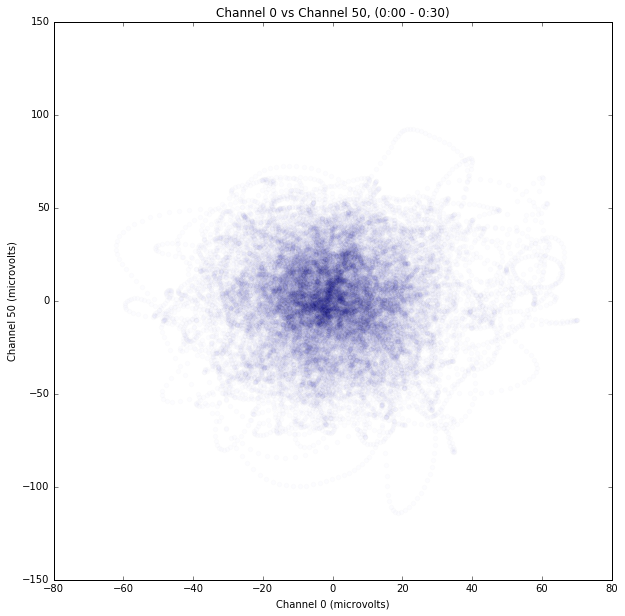

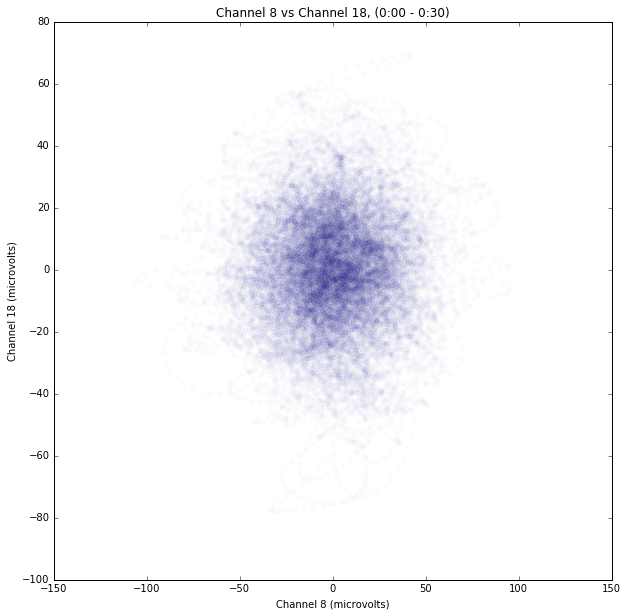

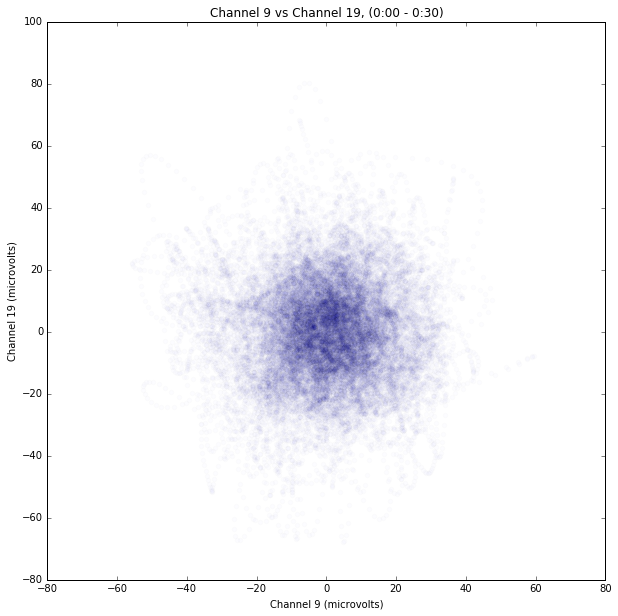

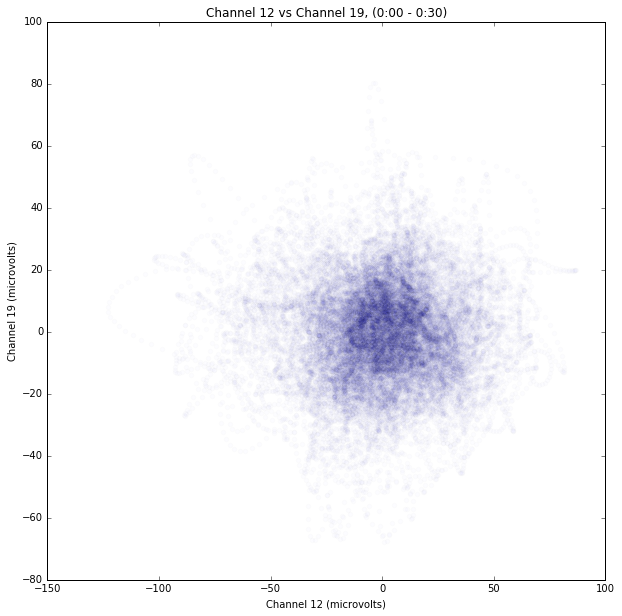

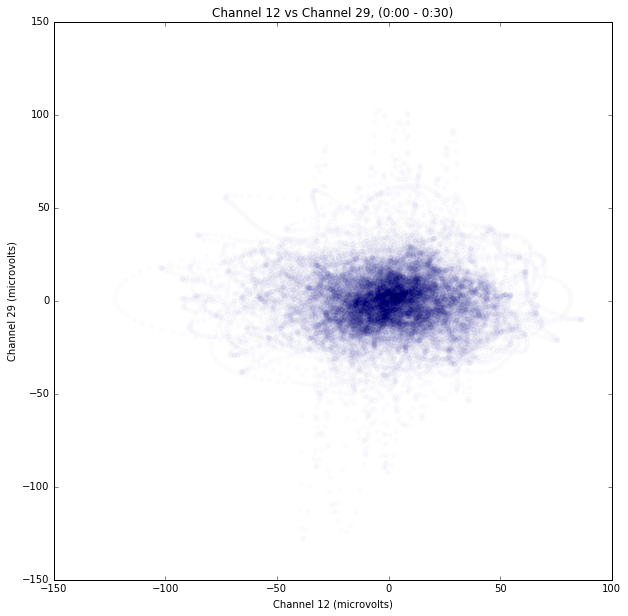

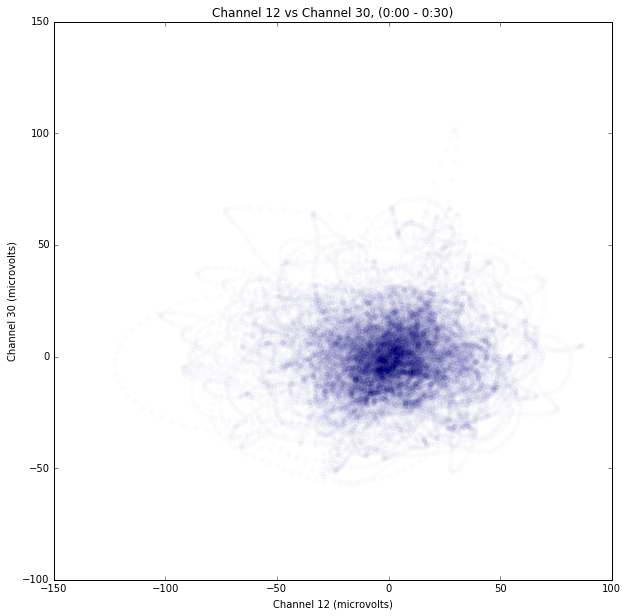

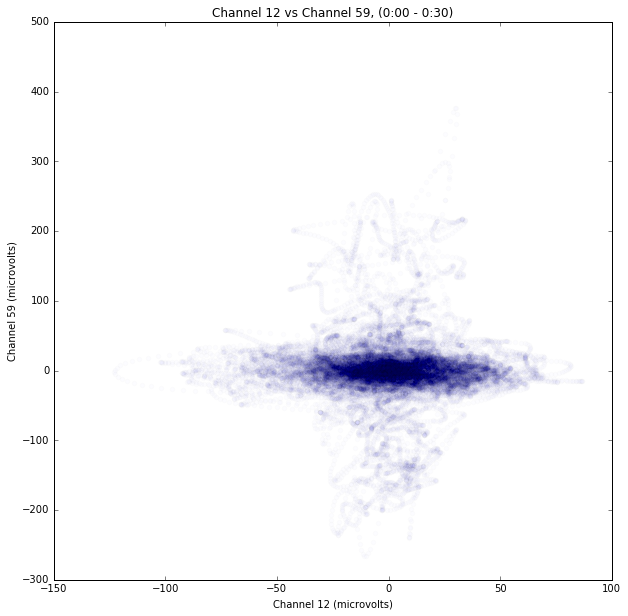

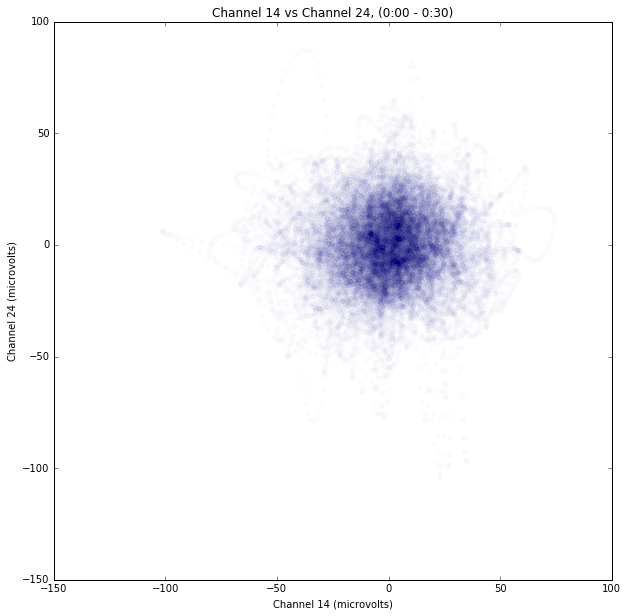

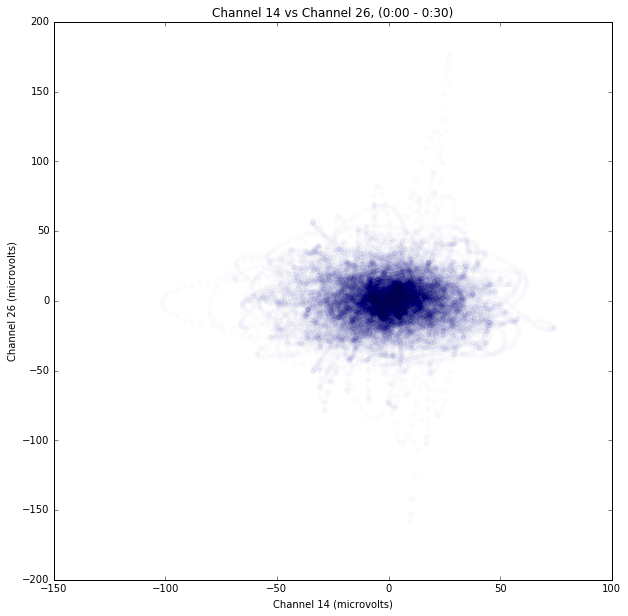

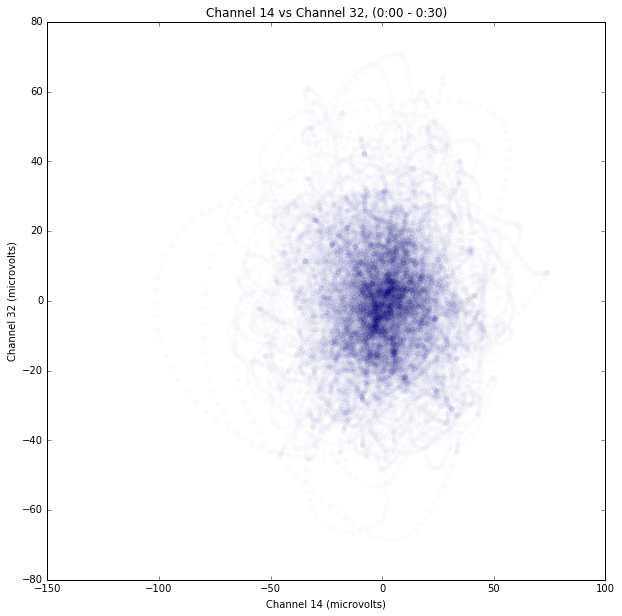

In [39]:
counter = 10
for interval, edge in zeroed_value:
    if counter > 0:
        counter -= 1
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        key1, key2 = edge_to_channel[edge]
        time_start = interval * 30000
        time_end = time_start + 30000

        if(time_start%60000 == 0):
            time_frame = str(time_start/60000) + ":00 - " + str(time_start/60000) + ":30"
        else:
            time_frame = str(time_start/60000) + ":30 - " + str(time_start/60000 + 1) + ":00"

        ax.scatter(data[key1][time_start:time_end], data[key2][time_start:time_end], alpha=0.01)
        ax.set_xlabel('Channel %s (microvolts)' %key1)
        ax.set_ylabel('Channel %s (microvolts)' %key2)
        ax.set_title('Channel %s vs Channel %s, (%s)' %(key1, key2, time_frame))
        plt.show()

In [32]:
# total_zero = 0
high_negative = []
for i in range(len(channels_data)):
    for j in range(len(channels_data[i])):
        if channels_data[i][j] < -0.9:
            high_negative.append((i,j))
#             total_zero += 1
# print total_zero
print high_negative

[(112, 0), (112, 1), (112, 2), (112, 3), (112, 4), (112, 5), (112, 7), (112, 8), (112, 10), (112, 11), (112, 12), (112, 13), (112, 14), (112, 15), (112, 16), (112, 17), (112, 18), (112, 19), (112, 21), (112, 22), (112, 23), (112, 27), (112, 28), (112, 29), (112, 30), (112, 34), (112, 35), (112, 36), (112, 37), (112, 40), (112, 41), (112, 42), (112, 43), (112, 44), (112, 45), (112, 46), (112, 47), (112, 48), (112, 49), (112, 50), (112, 52), (112, 53), (112, 54), (112, 56), (112, 57), (112, 65), (112, 68), (112, 79), (112, 83), (112, 84), (112, 85), (112, 90), (112, 92), (112, 97), (112, 98), (112, 117), (112, 118), (112, 123), (112, 126), (112, 137), (112, 141), (112, 142), (112, 143), (112, 148), (112, 149), (112, 150), (112, 155), (112, 156), (112, 175), (112, 176), (112, 180), (112, 183), (112, 194), (112, 198), (112, 199), (112, 200), (112, 205), (112, 207), (112, 212), (112, 213), (112, 232), (112, 233), (112, 236), (112, 239), (112, 250), (112, 254), (112, 255), (112, 256), (112, 

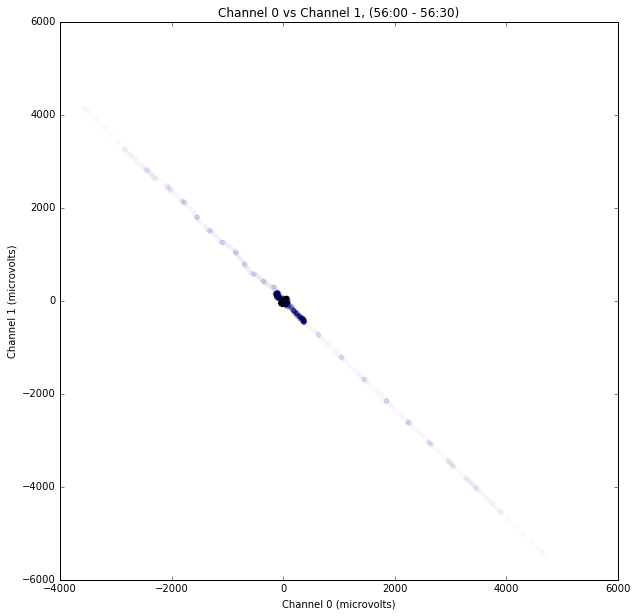

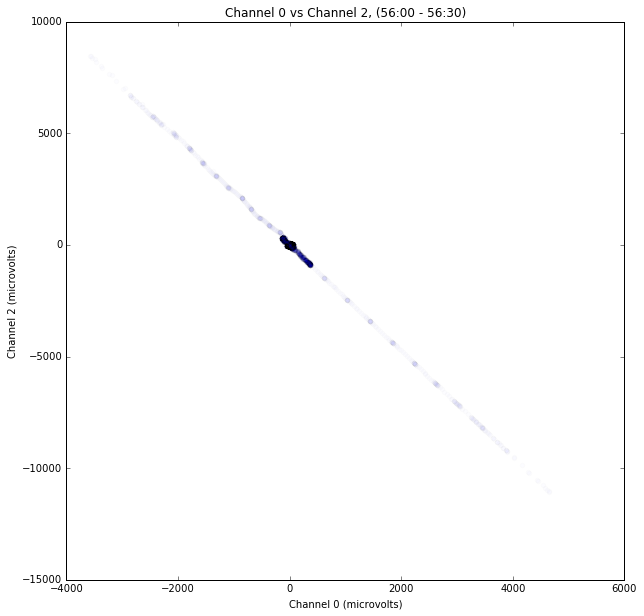

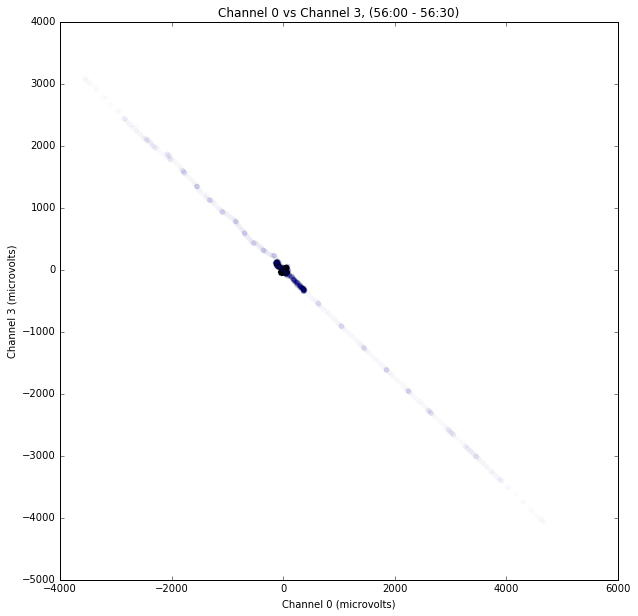

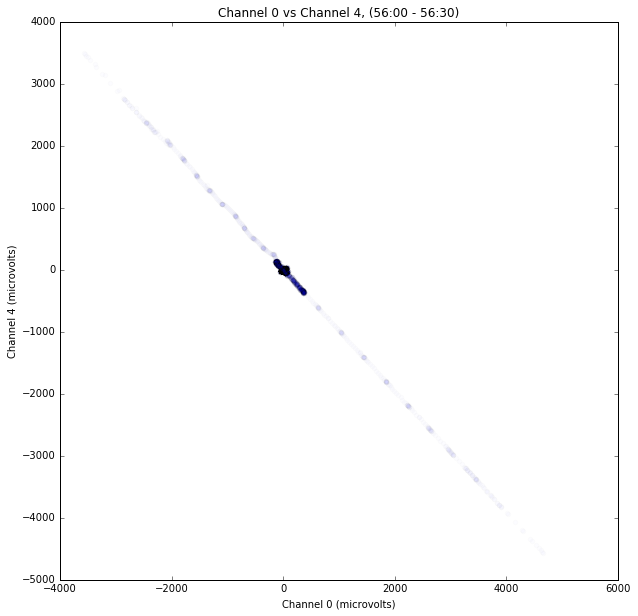

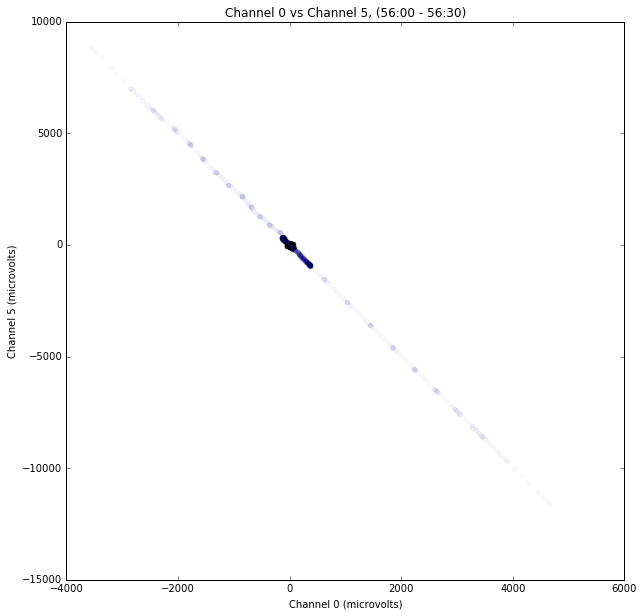

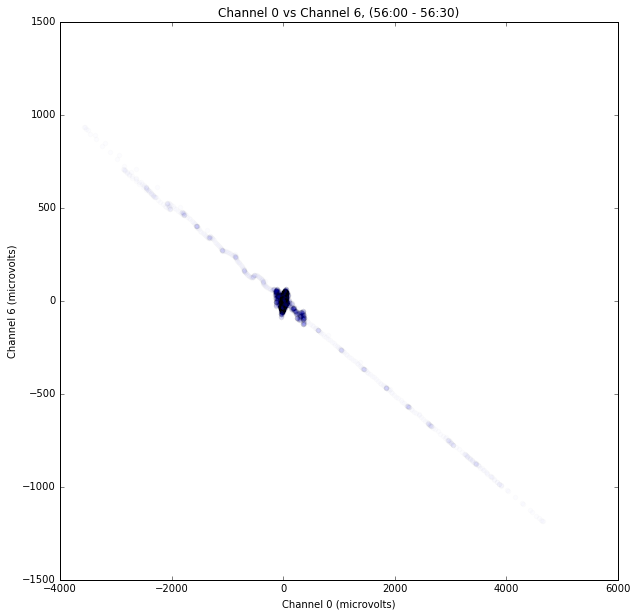

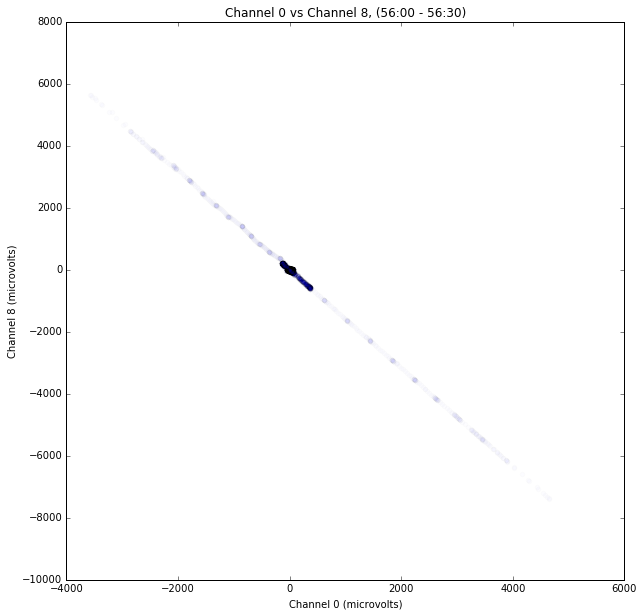

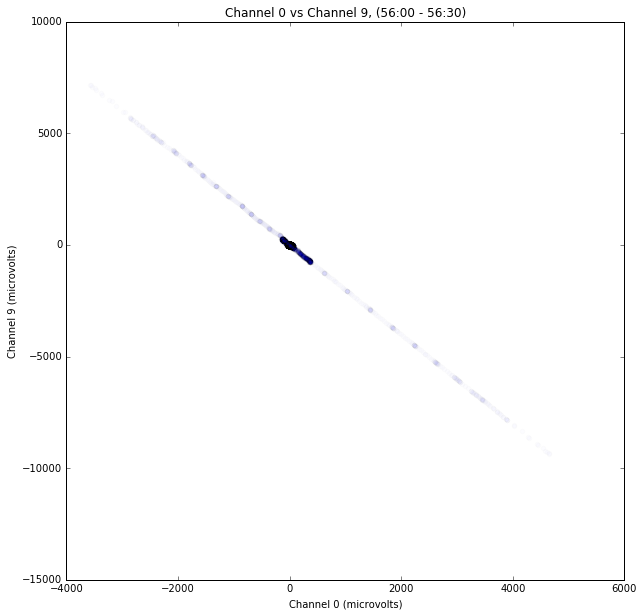

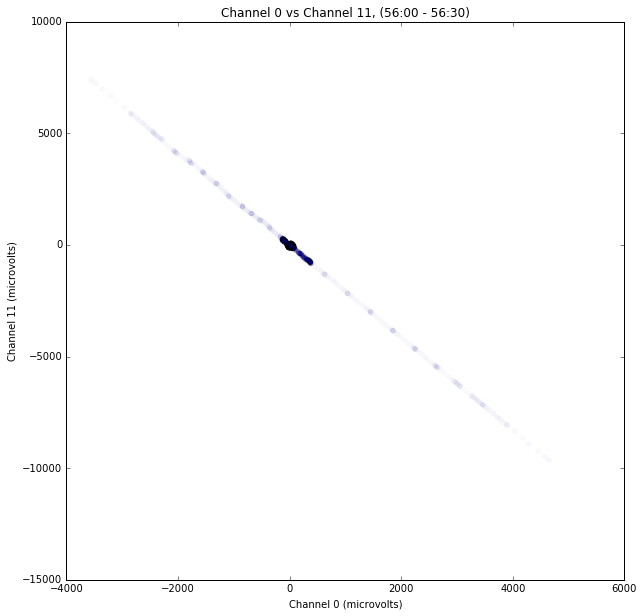

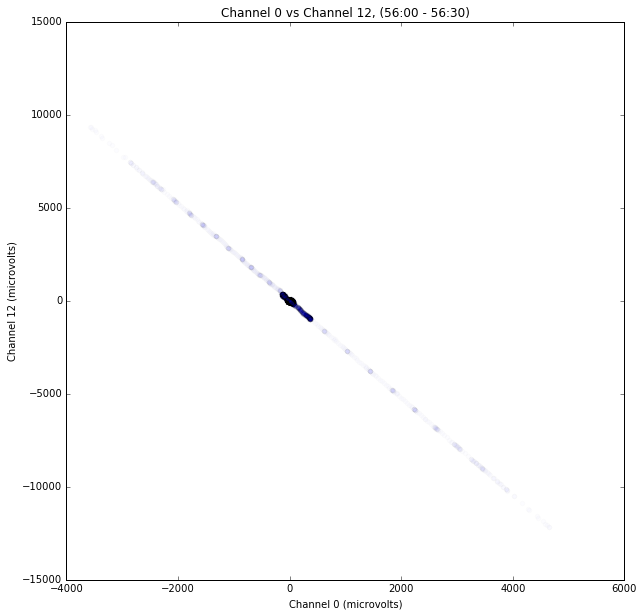

In [40]:
counter = 10
for interval, edge in high_negative:
    if counter > 0:
        counter -= 1
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        key1, key2 = edge_to_channel[edge]
        time_start = interval * 30000
        time_end = time_start + 30000

        if(time_start%60000 == 0):
            time_frame = str(time_start/60000) + ":00 - " + str(time_start/60000) + ":30"
        else:
            time_frame = str(time_start/60000) + ":30 - " + str(time_start/60000 + 1) + ":00"

        ax.scatter(data[key1][time_start:time_end], data[key2][time_start:time_end], alpha=0.01)
        ax.set_xlabel('Channel %s (microvolts)' %key1)
        ax.set_ylabel('Channel %s (microvolts)' %key2)
        ax.set_title('Channel %s vs Channel %s, (%s)' %(key1, key2, time_frame))
        plt.show()

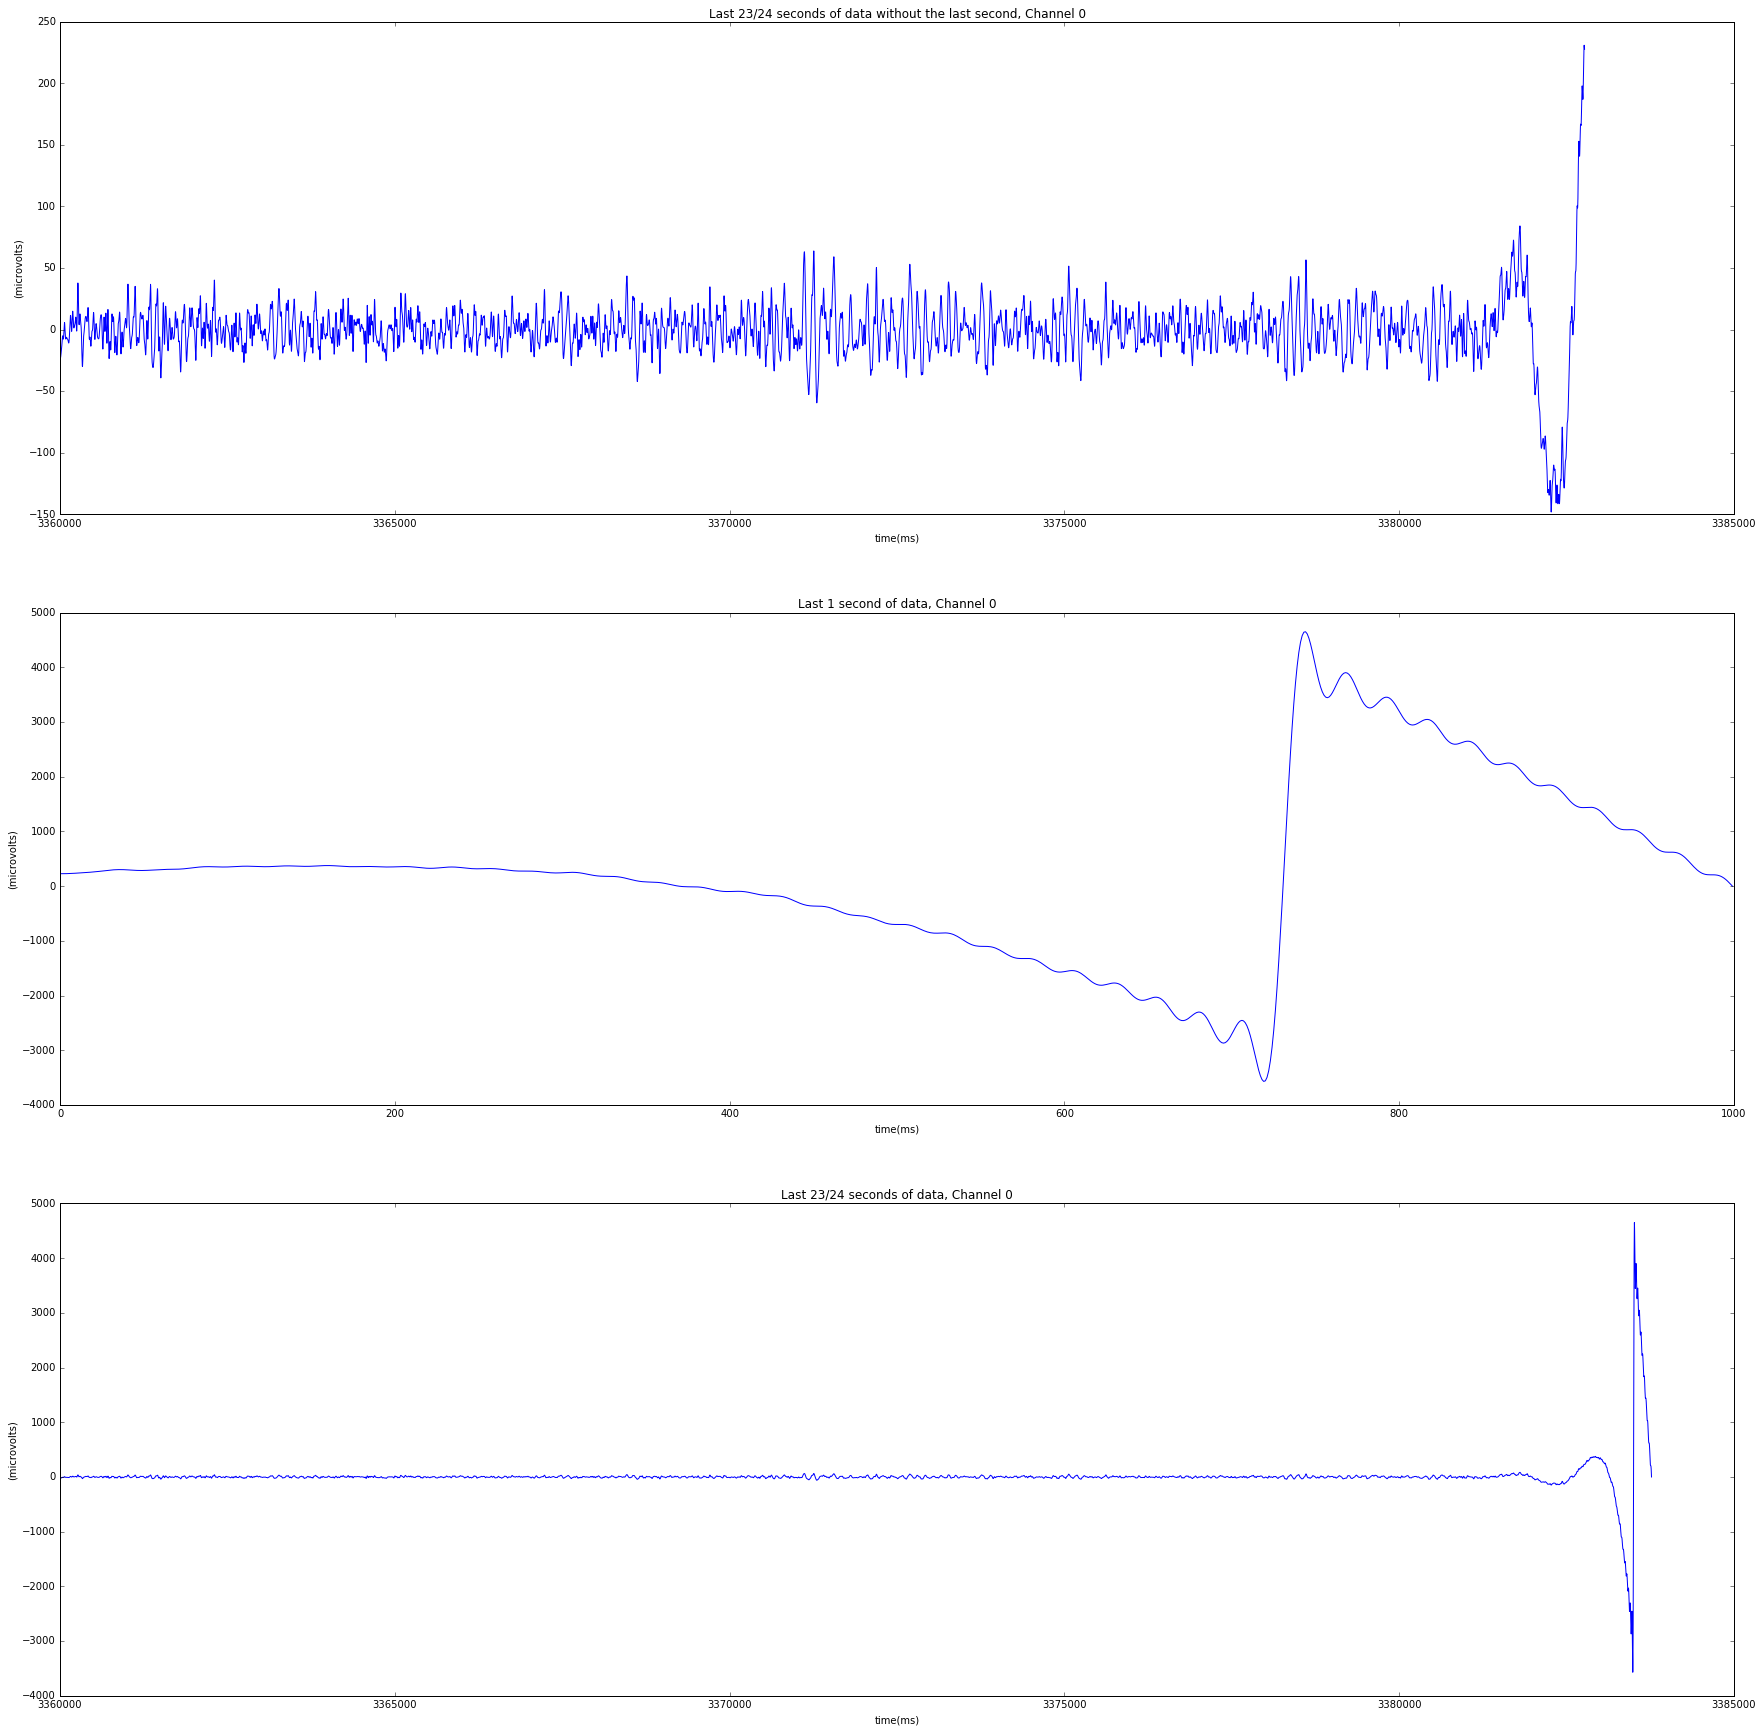

In [76]:
split_point = 3382768
fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)
ax1.plot(range(3360000, split_point), data[0][3360000:split_point])
ax1.set_title('Last 23/24 seconds of data without the last second, Channel 0')
ax1.set_xlabel("time(ms)")
ax1.set_ylabel("(microvolts)")

ax2.plot(range(1000), data[0][3382768:])
ax2.set_title('Last 1 second of data, Channel 0')
ax2.set_xlabel("time(ms)")
ax2.set_ylabel("(microvolts)")

ax3.plot(range(3360000, 3383768), data[0][3360000:])
ax3.set_title('Last 23/24 seconds of data, Channel 0')
ax3.set_xlabel("time(ms)")
ax3.set_ylabel("(microvolts)")
plt.savefig("Last interval after ICA")
plt.show()
# print len(range(3360000, 3376000)), len(data[2][3360000:3376000])

In [76]:
split_corr = [num] + [sets]
print sum(num)
print split_corr

111630
[[0, 0, 0, 3, 39, 35, 53, 133, 454, 880, 3135, 6091, 8181, 10715, 12414, 14324, 14549, 16122, 15848, 8654], [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]
